In [ ]:
# Mengimport seluruh library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Loading

In [ ]:
# Loading data
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA (Exploratory Data Analysis)
Pada tahap ini digunakan untuk mengenali data serta hubungan antar variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariate Analysis
digunakan untuk melihat histogram setiap fitur yang ada


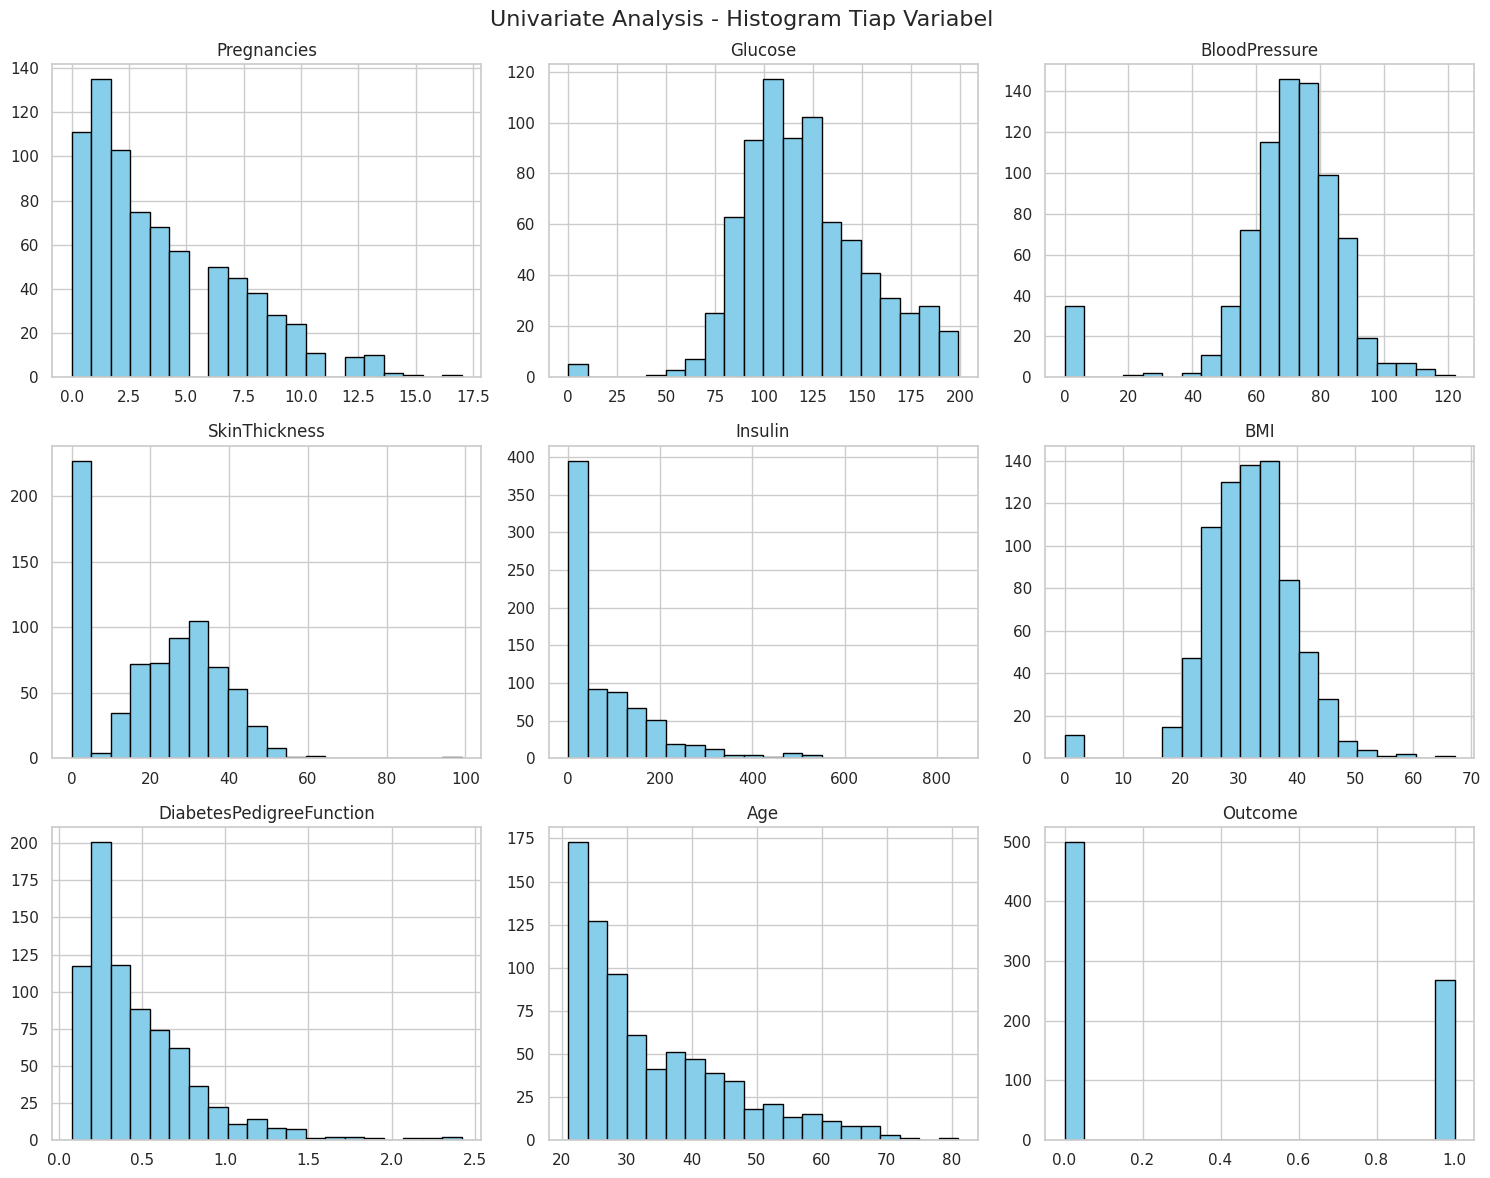

In [ ]:
# Set style
sns.set(style="whitegrid")

# Visualisasi histogram tiap fitur
df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis - Histogram Tiap Variabel', fontsize=16)
plt.tight_layout()
plt.show()


## Bivariate Analysis Dengan Target Outcome
digunakan untuk melihat hubungan antara variabel fitur dengan target

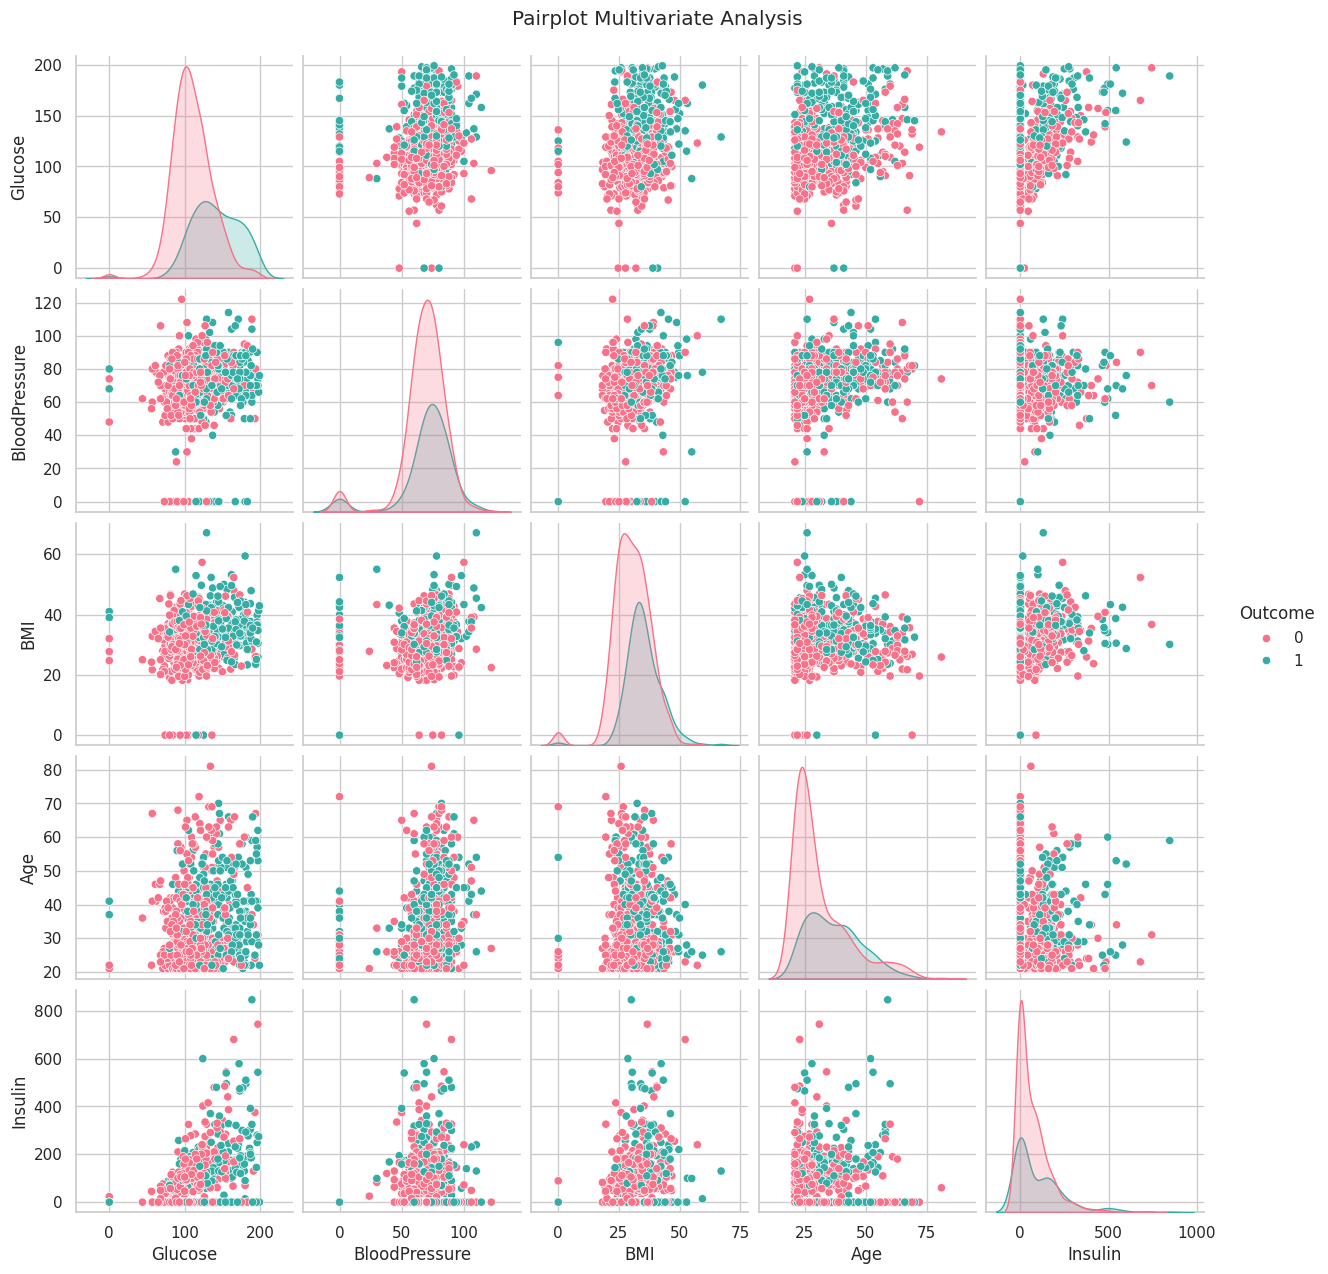

In [ ]:
# Memilih fitung yang dianggap penting
fitur = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin', 'Outcome']

# Pairplot
sns.pairplot(df[fitur], hue='Outcome', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot Multivariate Analysis', y=1.02)
plt.show()

## Korelasi antar Fitur
Tahap ini bertujuan untuk mengetahui fitur yang memiliki keterkaitan menggunakan heatmap

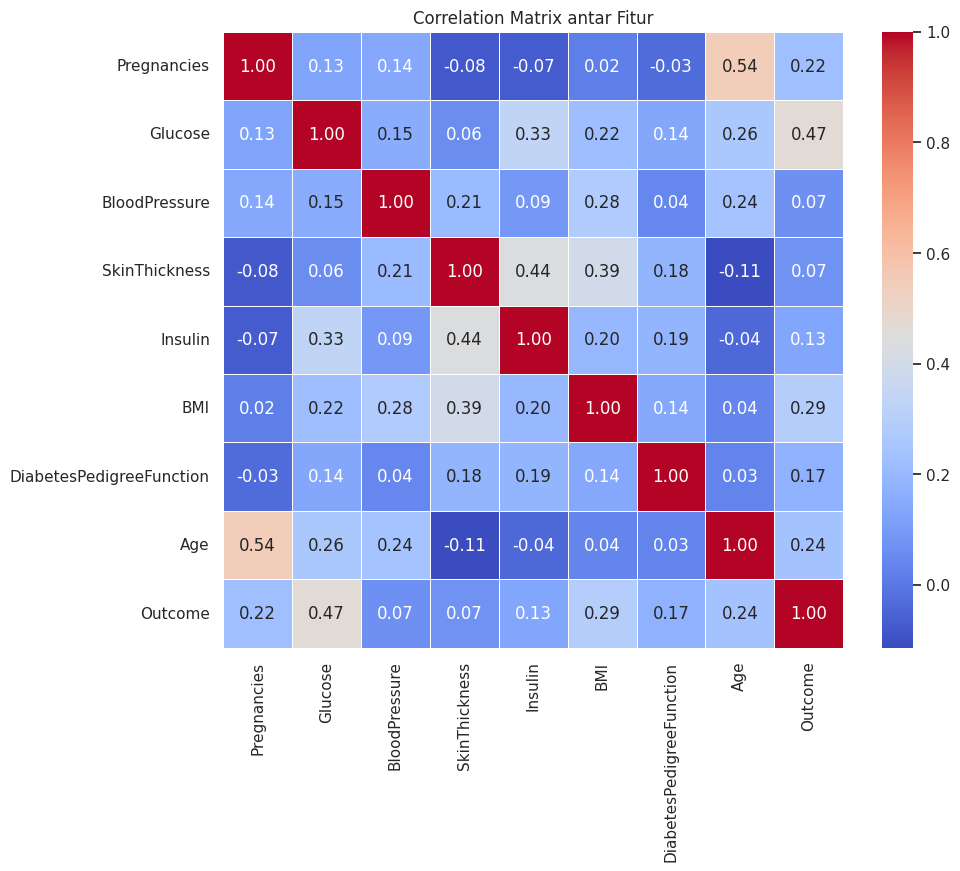

In [ ]:
# Hitung korelasi
correlation = df.corr()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix antar Fitur')
plt.show()

# Data Preparation
pada tahap ini bertujuan untuk menyiapkan data sebelum proses modelling. Langkah yang dilakukan yaitu melihat apakah ada nilai 0 pada fitur yang tidak masuk akal ketika bernilai nol seperti 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

## Data Cleaning

In [ ]:
# Daftar kolom yang tidak mungkin bernilai nol
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti nilai 0 dengan NaN
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Cek jumlah missing value
df[cols_with_zero_invalid].isnull().sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [ ]:
# Imputasi nilai NaN dengan median
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].fillna(df[cols_with_zero_invalid].median())

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Data Splitting
membagi dataset menjadi data latih data uji menggunakan library train_test_split

In [ ]:
# Pisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek jumlah data
print("jumlah data: ", len(X))
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

jumlah data:  768
Jumlah data latih: 614
Jumlah data uji: 154


## Standarisasi
Melakukan standarisasi terhadap fitur yang ada menggunakan standar scaler agar setiap nilai berada pada rentang yang sama sehingga mempercepat model konvergen

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting hanya pada data latih, lalu transform kedua set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar lebih mudah dibaca
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# Modelling
Membuat model menggunakan algoritma yang diusulkan yaitu Logistic Regression, Decision Tree, Random Forest

In [ ]:
# Inisialisasi seluruh model
logreg = LogisticRegression(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Melatih dengan data training
logreg.fit(X_train_scaled, y_train)
dtree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

## Evaluasi
mengevaluasi setiap model menggunakan matrik evaluasi akurasi, precision, recall dan F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fungsi untuk menampilkan hasil evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi   : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score  : {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("-" * 50)

# Evaluasi Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluasi Decision Tree
evaluate_model(y_test, y_pred_dtree, "Decision Tree")

# Evaluasi Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

Evaluasi Model: Logistic Regression
Akurasi   : 0.7078
Precision : 0.6000
Recall    : 0.5000
F1-Score  : 0.5455

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

--------------------------------------------------
Evaluasi Model: Decision Tree
Akurasi   : 0.6818
Precision : 0.5532
Recall    : 0.4815
F1-Score  : 0.5149

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154

-----------------------------

## Fitur Importance
Mencari fitur penting dari model random forest untuk mengetahui fitur mana yang memiliki peran besar dalam mendiagnosis diabetes

                    Feature  Importance
1                   Glucose    0.274086
5                       BMI    0.161903
6  DiabetesPedigreeFunction    0.125020
7                       Age    0.112985
4                   Insulin    0.091224
2             BloodPressure    0.083518
0               Pregnancies    0.080795
3             SkinThickness    0.070468


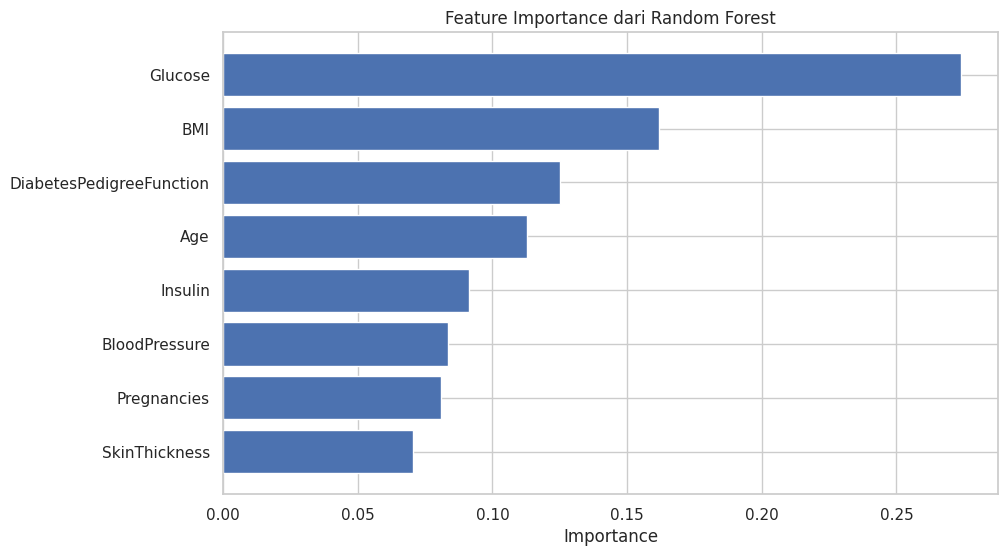

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengambil nilai importance fitur dari model random forest
importances = rf.feature_importances_

# Membuat DataFrame agar lebih mudah dipahami
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Urutkan berdasarkan nilai importance dari yang terbesar
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualisasi dengan bar plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance dari Random Forest')
plt.xlabel('Importance')
plt.show()
